***Biến đổi hồi quy***

***Classification (Phân loại)***: Khi target (biến phụ thuộc) là dạng categorical (phân loại), chẳng hạn như yes/no, positive/negative, hoặc các nhãn A, B, C, thì bài toán là classification.

***Regression (Hồi quy)***: Khi target là dạng continuous (số thực), ví dụ như giá trị float hoặc integer (như giá nhà, nhiệt độ, điểm số), thì đó là bài toán regression.

Ví dụ:

* Dự báo xem ngày mai trời có mưa hay không mưa. Target ở đây là dạng categorical với hai nhãn: mưa hoặc không mưa. 
* Dự báo nhiệt độ chính xác của ngày mai là bao nhiêu độ C. Target ở đây là một giá trị continuous, chẳng hạn 23.5°C, 30.0°C, 18.7°C.

Bài toán hồi quy là dạng supervised learning, trong đó tập dữ liệu có:
* Features: Các biến độc lập để dự đoán.
* Target: Biến mục tiêu (liên tục) cần dự đoán.

Mối quan hệ giữa hai biến:
* Biến phản hồi (Response variable) chính là biến target (biến mục tiêu), tức là giá trị mà mô hình cần dự đoán.
* Biến giải thích (Explanatory variable) chính là biến features (biến đặc trưng), tức là các biến độc lập được sử dụng để giải thích và dự đoán biến mục tiêu.

Bài toán tính residual nhỏ nhất thường là mục tiêu của phương pháp hồi quy tuyến tính (Linear Regression). Trong bài toán này, chúng ta muốn tìm ra một đường thẳng (hàm hồi quy) sao cho tổng bình phương các residuals là nhỏ nhất. Đây là phương pháp Ordinary Least Squares (OLS).
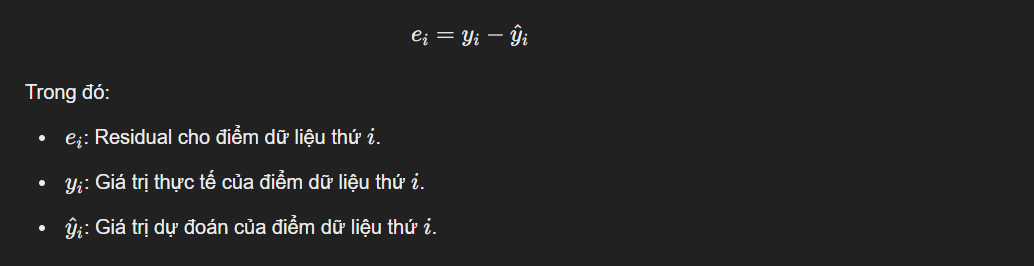

Lí do dùng phương pháp bình phương:

Khoảng cách nhỏ bị triệt tiêu, khoảng cách lớn bị phóng đại:
Bình phương sai số giúp giảm ảnh hưởng của các sai số nhỏ, trong khi làm nổi bật những sai số lớn hơn, nhằm làm cho mô hình phải tối ưu hoá tốt hơn ở những điểm có sai số lớn.

Không cần kiểm tra điều kiện và phân cụm như dùng trị tuyệt đối:
So với phương pháp dùng trị tuyệt đối (hàm |x|), việc bình phương sai số không yêu cầu phải xử lý các điểm có giá trị âm và dương riêng biệt, giúp đơn giản hóa quá trình tính toán và không cần điều kiện đặc biệt hay phân nhóm xử lý các điểm dữ liệu.

# Simple Linear Reqression

Simple Linear Regression là một mô hình hồi quy tuyến tính đơn giản được sử dụng để dự đoán mối quan hệ giữa hai biến: một biến độc lập (feature) và một biến phụ thuộc (target). Mục tiêu của mô hình là tìm ra một đường thẳng tuyến tính mô tả tốt nhất mối quan hệ giữa hai biến này.

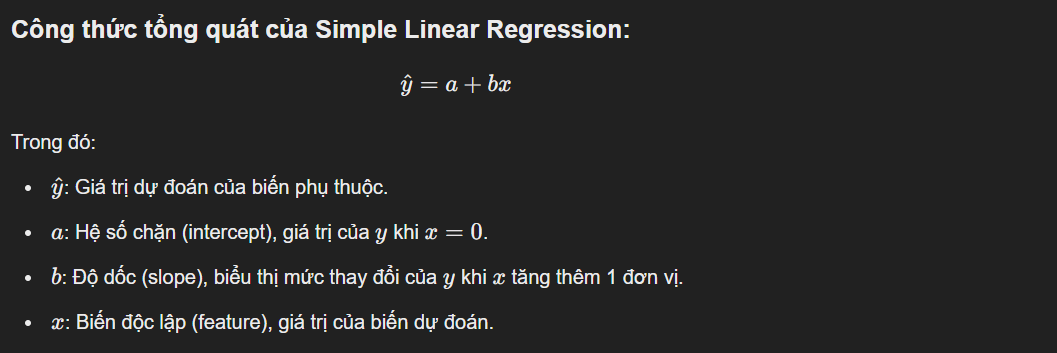

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [2]:
df = pd.read_excel("data/data_slr.xlsx")
df

,TimeAds,ProfitRate
0,0.5,1
1,2.0,2
2,4.0,7
3,5.0,8
4,3.0,5
5,6.0,8
6,7.0,9
7,9.0,12
8,8.0,10
9,1.0,3


In [3]:
df[["TimeAds", "ProfitRate"]].corr()

# Mức độ tương quan cao

,TimeAds,ProfitRate
TimeAds,1.000000,0.973732
ProfitRate,0.973732,1.000000


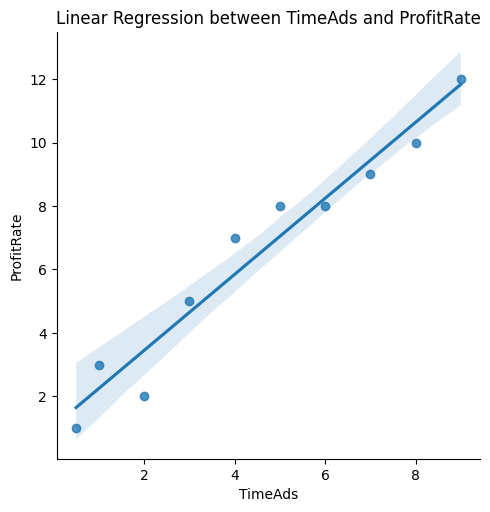

In [4]:
sns.lmplot(data=df, x='TimeAds', y='ProfitRate', fit_reg=True)
plt.title('Linear Regression between TimeAds and ProfitRate')
plt.xlabel('TimeAds')
plt.ylabel('ProfitRate')
plt.show()

In [5]:
X = df[["TimeAds"]].values # explanatory variable
Y = df[["ProfitRate"]].values # response variable

X = X.astype(float)
Y = Y.astype(float)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=16)
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [7]:
b0 = model.intercept_  # Hệ số b0 (intercept)
b1 = model.coef_       # Hệ số b1 (slope)

print(f"intercept: {b0}")
print(f"slope: {b1}")

intercept: [1.215311]
slope: [[1.14832536]]


In [8]:
results_df = pd.DataFrame({
    'X_test': X_test.flatten(),       # Dữ liệu X_test
    'Y_actual': Y_test.flatten(),     # Giá trị thực tế Y_test
    'Y_predict': y_pred.flatten(),    # Giá trị dự đoán từ mô hình
})

# Tính residual (sai số dự đoán) và delta (khoảng cách tuyệt đối)
results_df['Residual'] = results_df['Y_actual'] - results_df['Y_predict']
results_df['Delta'] = abs(results_df['Residual'])

# Hiển thị bảng kết quả
results_df

,X_test,Y_actual,Y_predict,Residual,Delta
0,7.0,9.0,9.253589,-0.253589,0.253589
1,4.0,7.0,5.808612,1.191388,1.191388
2,0.5,1.0,1.789474,-0.789474,0.789474
3,9.0,12.0,11.550239,0.449761,0.449761


In [9]:
y_test_pred = model.predict(X_test)

# Đánh giá mô hình
print('Score or R-Squared:', model.score(X_test, Y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(Y_test, y_test_pred))

Score or R-Squared: 0.9643356772543376
Mean Absolute Error: 0.6710526315789472
Root Mean Squared Error: 0.7598132826197573
Mean Absolute Percentage Error: 0.2563321181742236


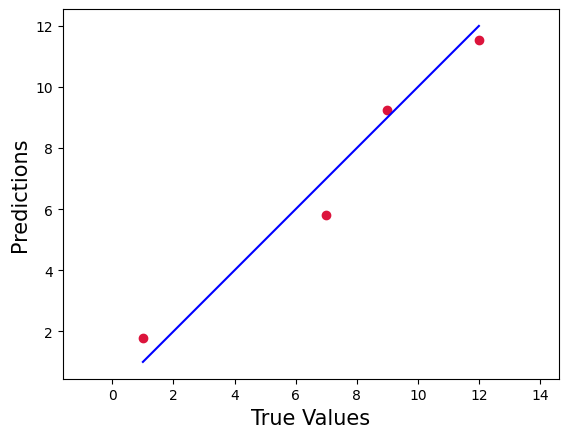

In [10]:
plt.scatter(Y_test, y_test_pred, c='crimson')
p1 = max(max(y_test_pred), max(Y_test))
p2 = min(min(y_test_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [11]:
# Lưu trữ mô hình đã huấn luyện xuống đĩa
with open('model/model_linear_regression.sav', 'wb') as model_file:
    pickle.dump(model, model_file)

# Đọc mô hình đã lưu và dự đoán với dữ liệu mới
with open('model/model_linear_regression.sav', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
    vTimeAds = float(input('Nhập thời lượng quảng cáo: '))
    predicted_ProfitRate = loaded_model.predict([[vTimeAds]])
    print(f'Dự báo điểm ProfitRate là: {predicted_ProfitRate[0][0]}')

Dự báo điểm ProfitRate là: 6.956937799043062
